## Project 7 - Sentiment Analysis

### **Assignment**  
Pick one of the company data files and build your own classifier. 

When you're satisfied with its performance (at this point just using the accuracy measure shown in the example):  
test it on one of the other datasets to see how well these kinds of classifiers translate from one context to another.

Include your model and a brief writeup of your feature engineering and selection process to submit and review with your mentor.

In [177]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [178]:
pd.options.display.max_colwidth = 100

In [181]:
def get_file_encoding(filename):
    import chardet
        
    filename = data_path
    with open(filename, 'rb') as f:
        content = f.read()

    charset = chardet.detect(content)
    # {'encoding': 'EUC-JP', 'confidence': 0.99}
    #print("character set = {}".format(charset['encoding']))
    
    return charset['encoding']

In [182]:
# Let's process the data)
def open_and_load_file (data_path, dataframename, columnnames):
    data_path = "../../../../Datafiles/sentiment_labelled_sentences/yelp_labelled.txt"
    file_encoding = get_file_encoding(data_path)
    df = pd.read_csv(data_path, delimiter= '\t', header=None, encoding=file_encoding) 
    df.columns = ['message', 'sentiment']
    df.columns = columnnames
    dataframename = df    
    return dataframename

In [179]:
def run_Bernoulli_supervised_learning():
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
    from sklearn.naive_bayes import BernoulliNB

    # Instantiate our model and store it in a new variable.
    bnb = BernoulliNB()

    # Fit our model to the data.
    bnb.fit(data, target)

    # Classify, storing the result in a new variable.
    y_pred = bnb.predict(data)

    # Display our results.
    return_message = "Number of mislabeled points out of a total {} points : {}".format(
        data.shape[0],
        (target != y_pred).sum()
    )

    return (return_message, data.shape[0], (target != y_pred).sum())

In [183]:
data_path = "../../../../Datafiles/sentiment_labelled_sentences/yelp_labelled.txt"
sentiment_raw = open_and_load_file(data_path, sentiment_raw, ['message', 'sentiment'])

In [184]:
sentiment_raw.dtypes

message      object
sentiment     int64
dtype: object

In [185]:
# sentiment_raw.sample(150)

In [186]:
keywords = ['blah', 'disgusted','fucking','dirt','avoid', 'mediocre,','elsewhere','wonderful','awesome','sucked',
            'shocked','disgraceful','awkward','not return','horrible','below average','bland','disgust','generous',
            'ample','huge','winner','definitely','reasonable', 'not good', 'awful','tender','quickly','awesome',
            'delicious','amazing','worth','phenomenal','helpful','good','fantastic','fresh','recommended', 
            'beautiful', 'outstanding', 'great','teamwork','enjoyed','inexpensive','fav','loved','approval',
            'delightful','flavorful','good','tasty','delight','beautiful','performed','amazing','cute','friendly',
            'BARGAIN', 'unreal','great','prompt','highly recommended','jewel', 'love', 'is worth', 'sticks around',
            'loved', 'hit']

In [187]:
for key in keywords:
    # Add spaces around the key so that we are getting theword,
    # not just pattern matching
    sentiment_raw[str(key)] = sentiment_raw.message.str.contains(' ' + str(key) + ' ', case=False)

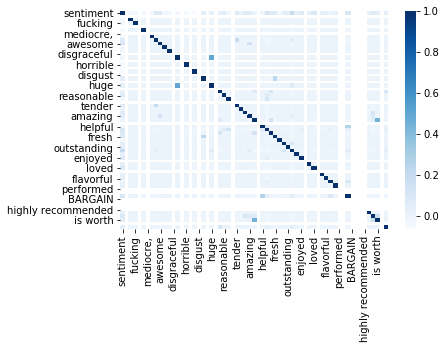

In [188]:
sns.heatmap(sentiment_raw.corr(), cmap="Blues")

In [189]:
data = sentiment_raw[keywords]
# data.sample(5)

In [190]:
target = sentiment_raw['sentiment']
# target.head(10)

In [191]:
xmsg, y, z = run_Bernoulli_supervised_learning()

In [192]:
print("xmsg={}, y={}, z={}".format(xmsg, y, z))

xmsg=Number of mislabeled points out of a total 1000 points : 353, y=1000, z=353
